In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Librerías importadas correctamente')

✅ Librerías importadas correctamente


In [2]:
# Cargar el conjunto de datos Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Convertir y (continuo) a 3 clases: bajo/medio/alto
q1, q2 = np.quantile(y, [0.33, 0.66])
y_class = np.digitize(y, bins=[q1, q2])

print('Clases:', np.unique(y_class, return_counts=True))

Clases: (array([0, 1, 2]), array([145, 145, 152]))


---
## 2) Importancia de variables (Random Forest vs Extra Trees)

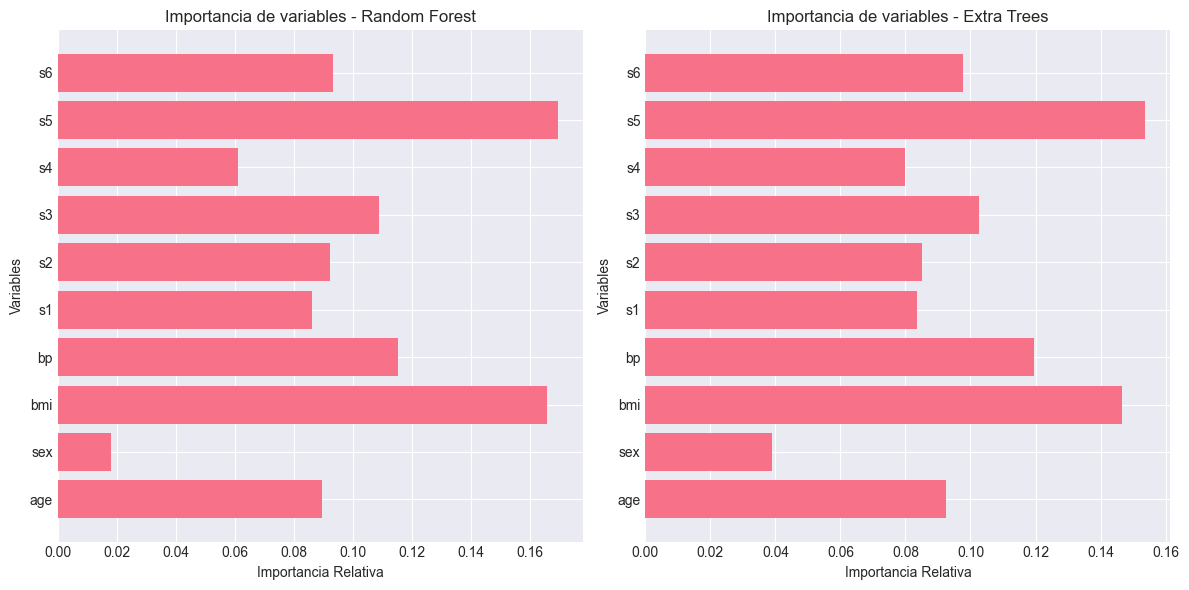

In [3]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y_class)
importances_rf = rf_model.feature_importances_

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X, y_class)
importances_extra = extra_trees_model.feature_importances_

# Visualización comparativa
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(importances_rf)), importances_rf, align='center')
plt.yticks(range(len(importances_rf)), feature_names)
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.title('Importancia de variables - Random Forest')

plt.subplot(1, 2, 2)
plt.barh(range(len(importances_extra)), importances_extra, align='center')
plt.yticks(range(len(importances_extra)), feature_names)
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.title('Importancia de variables - Extra Trees')

plt.tight_layout()
plt.show()

---
## 3) Evolución del error Out-of-Bag (OOB)

Calculamos el error OOB al variar el número de árboles.

c:\Users\Raul\Documents\Github\-UNIR-Aprendizaje-automatico-en-procesos-industriales\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Raul\Documents\Github\-UNIR-Aprendizaje-automatico-en-procesos-industriales\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Raul\Documents\Github\-UNIR-Aprendizaje-automatico-en-procesos-industriales\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Raul\Documents\Github\-UNIR-Aprendizaje-automatico-en-procesos-industriales\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning:

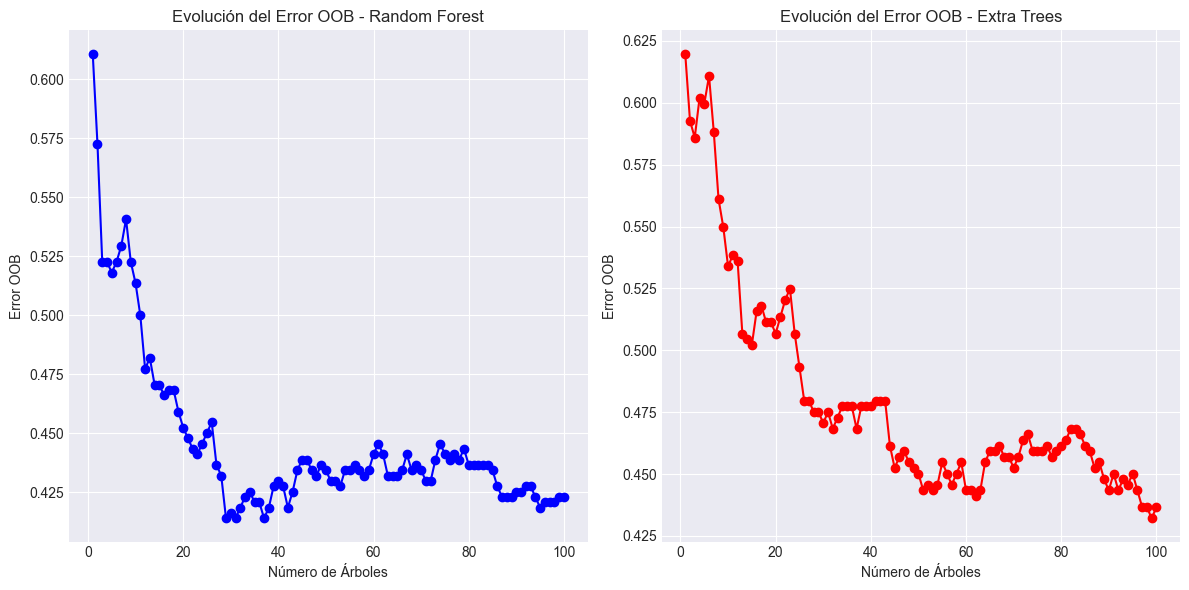

In [4]:
n_trees_range = range(1, 101)
oob_errors_rf = []
oob_errors_extra = []

for n_trees in n_trees_range:
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        bootstrap=True,
        oob_score=True,
        random_state=42
    )
    rf.fit(X, y_class)
    oob_errors_rf.append(1 - rf.oob_score_)

    et = ExtraTreesClassifier(
        n_estimators=n_trees,
        bootstrap=True,
        oob_score=True,
        random_state=42
    )
    et.fit(X, y_class)
    oob_errors_extra.append(1 - et.oob_score_)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, oob_errors_rf, marker='o', linestyle='-', color='b')
plt.title('Evolución del Error OOB - Random Forest')
plt.xlabel('Número de Árboles')
plt.ylabel('Error OOB')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, oob_errors_extra, marker='o', linestyle='-', color='r')
plt.title('Evolución del Error OOB - Extra Trees')
plt.xlabel('Número de Árboles')
plt.ylabel('Error OOB')
plt.grid(True)

plt.tight_layout()
plt.show()

---
## 4) Conclusiones

- Las importancias de variables suelen ser similares en ambos modelos.
- El error OOB se estabiliza al aumentar el número de árboles.
- **Extra Trees** suele ser más rápido, pero depende del dataset.